<a href="https://colab.research.google.com/github/likeshd/time_series_models_libraries/blob/main/2)TS_Multivariate_Modeling_DL(LSTM%2C_RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

mpl.rcParams["figure.figsize"] = (10,8)
mpl.rcParams["axes.grid"] = False

In [2]:
df = pd.read_csv("/content/energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
df["date"] = pd.to_datetime(df['date'],infer_datetime_format= True)

<ipython-input-4-84cb5dce20be>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date"] = pd.to_datetime(df['date'],infer_datetime_format= True)


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

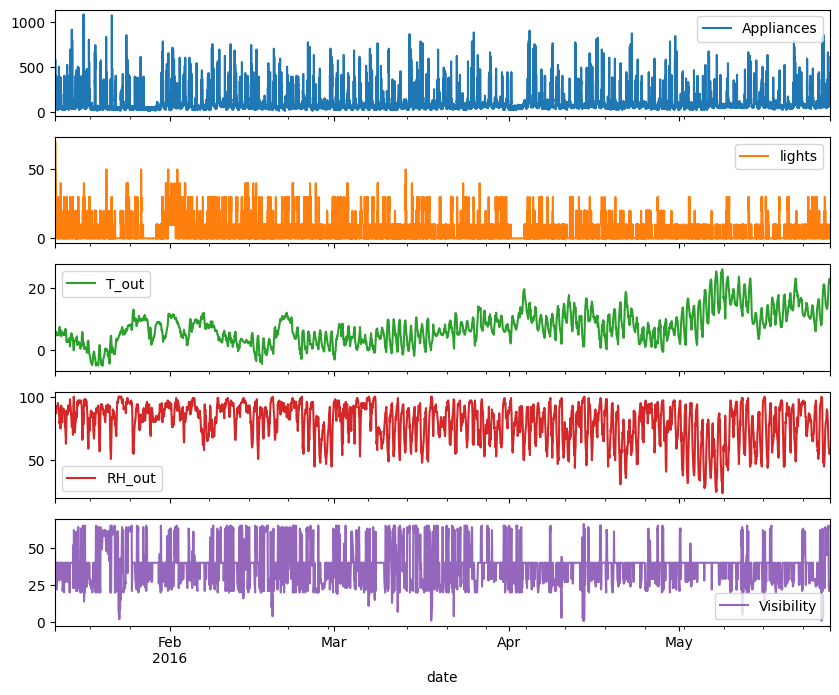

In [7]:
df.set_index('date')[['Appliances','lights','T_out', 'RH_out','Visibility']].plot(subplots=True)

In [10]:
df_input = df[['Appliances', 'T_out', 'RH_out' ,'Visibility']]
df_input

,Appliances,T_out,RH_out,Visibility
0,60,6.600000,92.000000,63.000000
1,60,6.483333,92.000000,59.166667
2,50,6.366667,92.000000,55.333333
3,50,6.250000,92.000000,51.500000
4,60,6.133333,92.000000,47.666667
...,...,...,...,...
19730,100,22.733333,55.666667,23.666667
19731,90,22.600000,56.000000,24.500000
19732,270,22.466667,56.333333,25.333333
19733,420,22.333333,56.666667,26.166667


In [9]:
df_input.describe()

,Appliances,T_out,RH_out,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,79.750418,38.330834
std,102.524891,5.317409,14.901088,11.794719
min,10.000000,-5.000000,24.000000,1.000000
25%,50.000000,3.666667,70.333333,29.000000
50%,60.000000,6.916667,83.666667,40.000000
75%,100.000000,10.408333,91.666667,40.000000
max,1080.000000,26.100000,100.000000,66.000000


In [15]:
df_input.query('Appliances > 500')

,Appliances,T_out,RH_out,Visibility
11,580,5.983333,91.166667,40.000000
314,520,2.900000,88.666667,36.333333
392,550,2.033333,94.333333,40.000000
393,690,2.100000,94.000000,40.000000
394,620,2.166667,93.666667,40.000000
...,...,...,...,...
19586,600,20.833333,45.333333,40.000000
19587,520,20.900000,45.500000,40.000000
19684,580,15.900000,79.333333,61.000000
19685,660,16.100000,78.666667,61.000000


In [17]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)
data_scaled

array([[0.04672897, 0.37299035, 0.89473684, 0.95384615],
       [0.04672897, 0.36923901, 0.89473684, 0.89487179],
       [0.03738318, 0.36548767, 0.89473684, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.4254386 , 0.37435897],
       [0.38317757, 0.87888532, 0.42982456, 0.38717949],
       [0.39252336, 0.87459807, 0.43421053, 0.4       ]])

In [18]:
data_scaled.shape

(19735, 4)

In [20]:
feature = data_scaled
target = data_scaled[:,0]


In [22]:
print(feature)
print(feature.shape)


[[0.04672897 0.37299035 0.89473684 0.95384615]
 [0.04672897 0.36923901 0.89473684 0.89487179]
 [0.03738318 0.36548767 0.89473684 0.83589744]
 ...
 [0.24299065 0.88317256 0.4254386  0.37435897]
 [0.38317757 0.87888532 0.42982456 0.38717949]
 [0.39252336 0.87459807 0.43421053 0.4       ]]
(19735, 4)


In [23]:
print(target)
print(target.shape)

[0.04672897 0.04672897 0.03738318 ... 0.24299065 0.38317757 0.39252336]
(19735,)


In [24]:
ts_generator = TimeseriesGenerator(feature, target, length = 2, sampling_rate=1,batch_size= 1)

In [26]:
ts_generator[0]

(array([[[0.04672897, 0.37299035, 0.89473684, 0.95384615],
         [0.04672897, 0.36923901, 0.89473684, 0.89487179]]]),
 array([0.03738318]))

In [27]:
x_train, x_test, y_train, y_test =  train_test_split(feature, target, test_size= 0.20, random_state= 112, shuffle = False)

In [28]:
x_train.shape

(15788, 4)

In [31]:
x_test.shape

(3947, 4)

In [32]:
window_len =720
batch_size = 32
num_feature = 4
train_generator = TimeseriesGenerator(x_train, y_train, length = window_len, sampling_rate=1,batch_size= batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length = window_len, sampling_rate=1,batch_size= batch_size)

In [37]:
train_generator[0]


(array([[[0.04672897, 0.37299035, 0.89473684, 0.95384615],
         [0.04672897, 0.36923901, 0.89473684, 0.89487179],
         [0.03738318, 0.36548767, 0.89473684, 0.83589744],
         ...,
         [0.06542056, 0.25241158, 0.73026316, 0.79230769],
         [0.05607477, 0.23901393, 0.76754386, 0.72820513],
         [0.06542056, 0.22561629, 0.80482456, 0.66410256]],
 
        [[0.04672897, 0.36923901, 0.89473684, 0.89487179],
         [0.03738318, 0.36548767, 0.89473684, 0.83589744],
         [0.03738318, 0.36173633, 0.89473684, 0.77692308],
         ...,
         [0.05607477, 0.23901393, 0.76754386, 0.72820513],
         [0.06542056, 0.22561629, 0.80482456, 0.66410256],
         [0.06542056, 0.21221865, 0.84210526, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.89473684, 0.83589744],
         [0.03738318, 0.36173633, 0.89473684, 0.77692308],
         [0.04672897, 0.35798499, 0.89473684, 0.71794872],
         ...,
         [0.06542056, 0.22561629, 0.80482456, 0.66410256],
        

In [39]:
model =tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape =(window_len,num_feature),return_sequences= True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences= True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences= False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))



In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 720, 128)          68096     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout_2 (Dropout)         (None, 720, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [43]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
model.compile(loss= tf.losses.MeanSquaredError(), optimizer =tf.optimizers.Adam(),metrics = [tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator, epochs=50, validation_data= test_generator, shuffle = False, callbacks =[early_stopping])

Epoch 1/50


<ipython-input-43-58f1dc049cf0>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50, validation_data= test_generator, shuffle = False, callbacks =[early_stopping])


471/471 [==============================] - 1181s 2s/step - loss: 0.0088 - mean_absolute_error: 0.0526 - val_loss: 0.0064 - val_mean_absolute_error: 0.0580
Epoch 2/50
471/471 [==============================] - 1141s 2s/step - loss: 0.0069 - mean_absolute_error: 0.0441 - val_loss: 0.0049 - val_mean_absolute_error: 0.0449
Epoch 3/50
471/471 [==============================] - 1151s 2s/step - loss: 0.0049 - mean_absolute_error: 0.0356 - val_loss: 0.0033 - val_mean_absolute_error: 0.0296
Epoch 4/50
471/471 [==============================] - 1180s 3s/step - loss: 0.0043 - mean_absolute_error: 0.0322 - val_loss: 0.0033 - val_mean_absolute_error: 0.0318
Epoch 5/50
471/471 [==============================] - 1189s 3s/step - loss: 0.0041 - mean_absolute_error: 0.0316 - val_loss: 0.0032 - val_mean_absolute_error: 0.0261
Epoch 6/50
471/471 [==============================] - 1134s 2s/step - loss: 0.0041 - mean_absolute_error: 0.0313 - val_loss: 0.0032 - val_mean_absolute_error: 0.0285
Epoch 7/50
471/

In [44]:
model.evaluate_generator(test_generator, verbose =0)

<ipython-input-44-bbe713c2d124>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose =0)


[0.0032063571270555258, 0.02964104153215885]

In [45]:
predictions =model.predict_generator(test_generator)

<ipython-input-45-b5e0623a62e4>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions =model.predict_generator(test_generator)


In [46]:
predictions.shape[0]

3227

In [47]:
y_test

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [48]:
x_test

array([[0.3364486 , 0.34297964, 0.90350877, 0.6       ],
       [0.54205607, 0.34726688, 0.88815789, 0.6       ],
       [0.28971963, 0.35155413, 0.87280702, 0.6       ],
       ...,
       [0.24299065, 0.88317256, 0.4254386 , 0.37435897],
       [0.38317757, 0.87888532, 0.42982456, 0.38717949],
       [0.39252336, 0.87459807, 0.43421053, 0.4       ]])

In [49]:
x_test[:,1:][window_len:]

array([[0.45337621, 0.49561404, 0.6       ],
       [0.47106109, 0.46710526, 0.6       ],
       [0.48874598, 0.43859649, 0.6       ],
       ...,
       [0.88317256, 0.4254386 , 0.37435897],
       [0.87888532, 0.42982456, 0.38717949],
       [0.87459807, 0.43421053, 0.4       ]])

In [51]:
df_pred =pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][window_len:])], axis =1)
df_pred

,0,0,1,2
0,0.072960,0.453376,0.495614,0.600000
1,0.096075,0.471061,0.467105,0.600000
2,0.119985,0.488746,0.438596,0.600000
3,0.341296,0.506431,0.410088,0.600000
4,0.151700,0.524116,0.381579,0.600000
...,...,...,...,...
3222,0.096872,0.891747,0.416667,0.348718
3223,0.112172,0.887460,0.421053,0.361538
3224,0.097724,0.883173,0.425439,0.374359
3225,0.277363,0.878885,0.429825,0.387179


In [52]:
rev_trans =scaler.inverse_transform(df_pred)
rev_trans

array([[ 88.0676908 ,   9.1       ,  61.66666667,  40.        ],
       [112.8002961 ,   9.65      ,  59.5       ,  40.        ],
       [138.38400505,  10.2       ,  57.33333333,  40.        ],
       ...,
       [114.56489325,  22.46666667,  56.33333333,  25.33333333],
       [306.77863568,  22.33333333,  56.66666667,  26.16666667],
       [313.73861641,  22.2       ,  57.        ,  27.        ]])

In [54]:
df_final =df_input[predictions.shape[0]* -1:]
df_final

,Appliances,T_out,RH_out,Visibility
16508,90,9.100000,61.666667,40.000000
16509,120,9.650000,59.500000,40.000000
16510,390,10.200000,57.333333,40.000000
16511,240,10.750000,55.166667,40.000000
16512,120,11.300000,53.000000,40.000000
...,...,...,...,...
19730,100,22.733333,55.666667,23.666667
19731,90,22.600000,56.000000,24.500000
19732,270,22.466667,56.333333,25.333333
19733,420,22.333333,56.666667,26.166667


In [55]:
df_input.count()

Appliances    19735
T_out         19735
RH_out        19735
Visibility    19735
dtype: int64

In [ ]:
df_final["App_Pred"] = rev_trans[:,0]

In [57]:
df_final

,Appliances,T_out,RH_out,Visibility,App_Pred
16508,90,9.100000,61.666667,40.000000,88.067691
16509,120,9.650000,59.500000,40.000000,112.800296
16510,390,10.200000,57.333333,40.000000,138.384005
16511,240,10.750000,55.166667,40.000000,375.187057
16512,120,11.300000,53.000000,40.000000,172.319085
...,...,...,...,...,...
19730,100,22.733333,55.666667,23.666667,113.653170
19731,90,22.600000,56.000000,24.500000,130.024303
19732,270,22.466667,56.333333,25.333333,114.564893
19733,420,22.333333,56.666667,26.166667,306.778636


<Axes: >

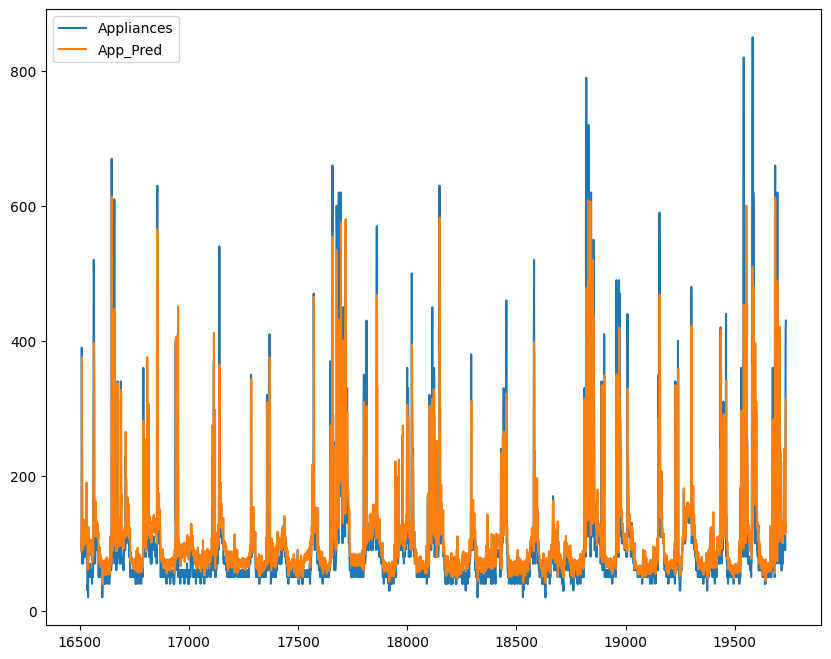

In [58]:
df_final[["Appliances", "App_Pred"]].plot()